# Grade: /100 pts

# Lab Assignment 04: Regularization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 500)

%matplotlib inline

### Question1: Preprocessing (5pt)
**Make sure to only use the imports included in the first cell. Any additional imports used will result in 0.** <br>
Tasks:
* Load the data present in 'footballer_small.csv' using the pandas library and store the loaded data in a dataframe
* Drop the variables: 'ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'
* Dummy code the variables: work_rate_att, work_rate_def, preferred_foot. **Because we are running a regularized model, we do not want to drop the first column**
* Get a test data set of size 500 - to make results comparable to solutions, set random_state = 0 <br>

In [2]:
football = pd.read_csv('footballer_small.csv')
# Droping the variables
football = football.drop(['ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'], axis=1)
# Dummy Variables
dummy_vars = ["work_rate_att", "work_rate_def", "preferred_foot"]
football = pd.concat([football.drop(dummy_vars, axis=1), pd.get_dummies(football[dummy_vars])], axis=1)

y = football.overall
X = football.drop(['overall'], axis=1)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=500,random_state=0)

football.head()

,age,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,work_rate_att_High,work_rate_att_Low,work_rate_att_Medium,work_rate_def_High,work_rate_def_Low,work_rate_def_Medium,preferred_foot_Left,preferred_foot_Right
0,29,186.0,82.0,68,70,50,56,61,66,74,1,2,3,58,44,65,59,49,56,48,42,58,68,64,74,66,62,59,59,80,73,76,51,70,64,43,52,69,65,63,70,0,0,1,0,0,1,0,1
1,21,194.0,87.0,59,61,57,53,61,45,54,1,1,2,15,19,15,25,13,16,16,15,19,18,48,42,40,57,33,20,44,39,56,14,25,23,12,26,22,22,15,16,0,0,1,0,0,1,0,1
2,23,175.0,72.0,65,85,28,55,62,60,68,1,2,2,60,22,54,58,24,59,30,35,57,62,88,83,70,53,75,43,73,79,65,24,58,52,48,55,31,34,60,67,0,0,1,1,0,0,0,1
3,26,185.0,80.0,73,76,54,67,73,69,78,1,2,3,76,41,60,64,52,75,59,40,73,73,73,78,67,68,63,65,70,87,79,74,67,75,68,68,38,66,66,69,0,0,1,0,0,1,0,1
4,19,182.0,76.0,48,47,46,51,50,39,47,1,1,2,14,11,13,26,12,14,11,11,22,15,37,41,33,45,43,18,56,28,49,12,18,12,12,25,16,38,12,12,0,0,1,0,0,1,0,1


In [3]:
X

,age,height_cm,weight_kg,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,work_rate_att_High,work_rate_att_Low,work_rate_att_Medium,work_rate_def_High,work_rate_def_Low,work_rate_def_Medium,preferred_foot_Left,preferred_foot_Right
0,29,186.0,82.0,70,50,56,61,66,74,1,2,3,58,44,65,59,49,56,48,42,58,68,64,74,66,62,59,59,80,73,76,51,70,64,43,52,69,65,63,70,0,0,1,0,0,1,0,1
1,21,194.0,87.0,61,57,53,61,45,54,1,1,2,15,19,15,25,13,16,16,15,19,18,48,42,40,57,33,20,44,39,56,14,25,23,12,26,22,22,15,16,0,0,1,0,0,1,0,1
2,23,175.0,72.0,85,28,55,62,60,68,1,2,2,60,22,54,58,24,59,30,35,57,62,88,83,70,53,75,43,73,79,65,24,58,52,48,55,31,34,60,67,0,0,1,1,0,0,0,1
3,26,185.0,80.0,76,54,67,73,69,78,1,2,3,76,41,60,64,52,75,59,40,73,73,73,78,67,68,63,65,70,87,79,74,67,75,68,68,38,66,66,69,0,0,1,0,0,1,0,1
4,19,182.0,76.0,47,46,51,50,39,47,1,1,2,14,11,13,26,12,14,11,11,22,15,37,41,33,45,43,18,56,28,49,12,18,12,12,25,16,38,12,12,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,28,188.0,87.0,73,72,64,72,50,72,1,1,2,12,13,10,36,12,12,11,14,26,23,51,49,55,66,50,22,79,21,59,17,20,10,10,31,22,60,16,11,0,0,1,0,0,1,0,1
2996,25,180.0,70.0,91,42,50,68,37,53,1,4,1,46,42,63,52,44,68,45,44,51,58,90,91,90,55,91,41,72,78,40,40,51,35,53,51,39,51,39,28,0,0,1,0,1,0,0,1
2997,17,187.0,70.0,61,61,53,63,31,45,1,3,3,58,66,43,57,51,64,49,46,45,69,60,62,58,37,58,69,48,45,50,42,33,23,53,49,69,51,27,34,0,0,1,0,0,1,0,1
2998,36,175.0,72.0,58,49,62,63,62,62,1,2,3,57,31,69,65,55,63,46,35,59,59,56,59,68,56,75,65,72,32,76,62,62,64,67,73,63,65,62,60,0,0,1,1,0,0,0,1


In [4]:
y

0       68
1       59
2       65
3       73
4       48
        ..
2995    72
2996    60
2997    58
2998    61
2999    65
Name: overall, Length: 3000, dtype: int64

## Question 2: Building the pipeline that preprocesses the data (10pts)
In order to properly build the regression model, the features need to be standardized so that no feature can dominate others in determining the prediction values due to differences in feature scales. 

**1.** Build the pipeline that **preprocesses** the feature columns of the training data and **create** a linear regression model. 

**2.** Plot the data **before** and **after** the standardization for the stamina feature. <br>

*NOTE: In this question, there is no need to overwrite the training set's values. Create a new variable to include the standardized data. The original training data is needed for future exercises.*

**3.** **Question**: Make observations about the plots.  

In [5]:
stamina_train = X_train.stamina

pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('linear_regression',sk.linear_model.LinearRegression())])

scaled_stamina = pipeline.named_steps['scaler'].fit_transform(X_train)[:, 29]

/Users/joelmiller/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Before Standardization')

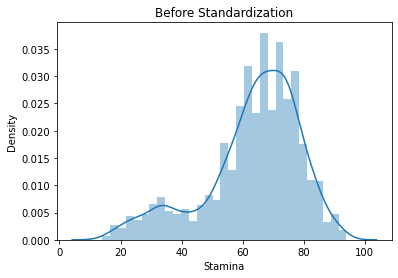

In [6]:
sns.distplot(stamina_train)
plt.xlabel("Stamina")
plt.title("Before Standardization")

/Users/joelmiller/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'After Standardization')

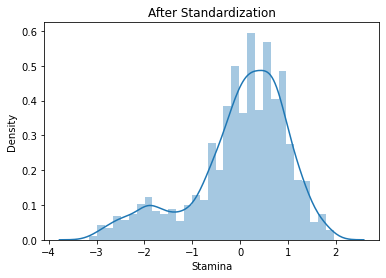

In [7]:
sns.distplot(scaled_stamina)
plt.xlabel("Stamina")
plt.title("After Standardization")

Both plots look the exact same, however, the scale of the axis demonstrate that the standardized data ranges much less.

## Question 3: Creating a Complex feature model using 2-nd Polynomial features (10pts)
In this task, the training data consists of the quadratic terms and 2-way interactions of all features except one of standing_tackle, composure, and marking variable. <br> 

**1.** Create <b> four </b> different training sets:
* The first training set includes the quadratic terms and 2-way interactions of all the features. 
* The second/third/fourth training sets include all the features, their quadratic terms, and their 2-way interactions except the standing_tackle/composure/marking features. <br>

***Hint:*** *For the 2nd/3rd and 4th training sets, create the training sets without the aforementioned features and then apply polynomial expansion to the resultant sets.* 

**2.** **Questions:**
* How many **linear terms** are in each of the new feature set?
* How many **squared terms** are in each of the new feature set?
* How many **interaction terms** are in each of the new feature set? Give an **example of one of the interaction terms**. 

**How many linear terms are in each of the new feature set?**
48 and 47. 

**How many squared terms are in each of the new feature set?**
49x48/2=1152 and 48x47/2=1128. 

**How many interaction terms are in each of the new feature set? Give an example of one of the interaction terms.**
1152-48=1104 and 1128-47=1081

In [8]:
polynomialFeatures = PolynomialFeatures(degree=2)

all_features = polynomialFeatures.fit_transform(X_train)

training_no_standing = polynomialFeatures.fit_transform(X_train.drop(['standing_tackle'], axis=1))

training_no_composure = polynomialFeatures.fit_transform(X_train.drop(['composure'], axis=1))

training_no_marking = polynomialFeatures.fit_transform(X_train.drop(['marking'], axis=1))

## Question 4: Evaluating the backward feature search (15 pts)
In this question, you have to **use the pipeline created in question 2 and apply it to each of the training sets created in question 3**. Use 10-fold cross validation to report the validation error** on the training set using mean squared error as the metric. <br>

Show all the steps of the process and compare and analyze the results using the validation error reported. 

In [9]:
def mean_squared_error(y, y_hat):
    return np.mean((y-y_hat)**2)

score = sk.metrics.make_scorer(mean_squared_error)

def cv_standard(X, pipeline=pipeline):
    return cross_val_score(estimator = pipeline, X=X, y=y_train,cv=10, scoring=score)

train_all_features_cv = cv_standard(all_features)
train_no_standing_cv = cv_standard(training_no_standing)
train_no_composure_cv = cv_standard(training_no_composure)
train_no_marking_cv = cv_standard(training_no_marking)

print(train_all_features_cv.mean())
print(train_no_standing_cv.mean())
print(train_no_composure_cv.mean())
print(train_no_marking_cv.mean())

2.9749611017492237
2.75383264983658
2.8060026157733677
2.6969575410500237


## Question 5: Applying Ridge Regression (10 pts)

**1.** Build a pipeline that performs **scaling** and **fits the ridge regression** on the data that includes the polynomial expansion of all the features. The penalization parameter is set to 0.5. 

**2.** Use the pipeline to report the validation error using mean square error metric. Use 10-fold cross validation. 

In [10]:
ridge_regression_pipeline = Pipeline([('scaler', StandardScaler()),('ridge_regression', Ridge(alpha=0.5, fit_intercept=True))])

ridge_regression_scores = cv_standard(all_features, ridge_regression_pipeline)

print(ridge_regression_scores.mean())

1.7146770020406616


## Question 6: Tune the Ridge coefficient for the 2nd-order model   (15pt)
**1.** Now use 10-fold CV on the training set to determine a good setting for the regularization coefficient. Perform the search going from $\lambda = \exp(-8), \cdots, \exp(6)$ in 15 evenly spaced increments on the log scale. Plot the mean squared error as a function of $\log(\lambda)$. 


**2.** **Questions:**
* What is the best regularization parameter (actual not approximate)? 

* Why does the error increase as $\lambda \rightarrow 0?$  Why does the error increase when $\lambda \rightarrow \infty$?  Answer in terms of the bias variance trade off.

**What is the best regularization parameter (actual not approximate)?**
best_params_ attribute of GridSearchCV()

**Why does the error increase as  𝜆→0?
λ
→
0
?
  Why does the error increase when  𝜆→∞
λ
→
∞
 ? Answer in terms of the bias variance trade off.**
Varience increases as  𝜆→0
λ
→
0
  and bias increases as  𝜆→∞
λ
→
∞
  
  


{'ridge_regression__alpha': 7.38905609893065}


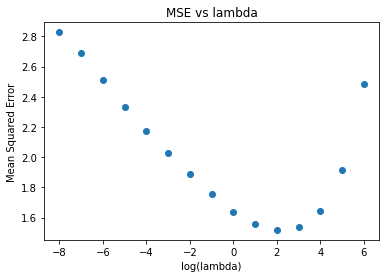

In [11]:
params = {'ridge_regression__alpha': np.exp(np.linspace(-8, 6, 15))}

grid_search = GridSearchCV(ridge_regression_pipeline, param_grid=params, scoring="neg_mean_squared_error", refit=True, cv=10)
grid_search.fit(polynomialFeatures.fit_transform(X_train),y_train)

plt.scatter(np.linspace(-8, 6, 15), -pd.DataFrame(grid_search.cv_results_).mean_test_score)
plt.title("MSE vs lambda")
plt.ylabel("Mean Squared Error")
plt.xlabel("log(lambda)")
print(grid_search.best_params_)

### Question 7: Test error  (10pt)
Now test how the ridge model, fitted to the whole training set, performs on the test data set. 


Report the following:

* The mean squared error on the test data - along with the 95% confidence interval, determined with the central limit theorem. 
* The proportion of the variance explained by your model - along wth a 95% confidence interval.

In [12]:
x_polynomial_features = polynomialFeatures.fit_transform(X_test)
pred_Y = grid_search.predict(x_polynomial_features)

squared_error = (y_test-pred_Y)**2
mse_test = squared_error.mean()

confidence_interval_mid = 1.96 * np.std(squared_error) / (len(pred_Y)**0.5)
confi = [mse_test-confidence_interval_mid, mse_test+confidence_interval_mid]

mean_def = (y_test- y_test.mean())**2
prop_variance_pred = 1-mse_test/mean_def.mean()

CI = [1-confi[1]/mean_def.mean(), 1-confi[0]/mean_def.mean()]


print(mse_test)
print(mse_test-confidence_interval_mid)
print(mse_test+confidence_interval_mid)
print(prop_variance_pred)
print(CI)

1.7057441746268678
1.3818374623997451
2.0296508868539904
0.9669042125842212
[0.9606195962567127, 0.9731888289117299]


## Question 8: Analyzing Ridge Coefficients (15 pts)
In this question:

**1.** you are first required to extract all the coefficients of the standing tackle, composure and marking features from the best model of question 7. 

**2.** After that, calculate the mean of the coefficients of the aforementioned features and analyze the results. 

**3.** **Question:** Based on these observations, draw conclusions about the results in question 4. 

**Based on these observations, draw conclusions about the results in question 4.**
The average of the coefficents for marking is lowest. The standing tackle attribute has the largest mean.

feature_names = polynomialFeatures.get_feature_names(X_train.columns)
second_order_coefs = np.array(grid_search.best_estimator_.named_steps['ridge_regression'].coef_)

def coef_grab(term):
    return [ second_order_coefs[i] for i in range(len(feature_names)) if term in feature_names[i]]


dcoefs = {"standing_tackle": coef_grab('standing_tackle'),
          "composure": coef_grab('composure'),
          "marking": coef_grab('marking')}
for k in dcoefs:
    print(f'{k}: {np.mean(dcoefs[k])}')

## Question 9: Lasso Regression (10pts)
Let us assume that you are building a linear regression model using only three features "standing tackle", "marking", and "composure" to predict a player's overall rating. 

**Question:** Based on the results of question 8, what do you think will be the features' coefficients while applying the lasso regression optimization? Answer in no more than 5 sentences. 

The coefficients related to standing_tackle will be the largest, the marking coefficients will be the smallest.  Some features may go to zero using Lasso regression.

## Note: 
After completing all the tasks and before submitting: 
* Restart you kernel by clicking 'Restart & Run all'
* Fix any errors resulting from the first step.
* Repeat the first two steps until no errors are encountered. 